In [1]:
import numpy as np
import pandas as pd
from random import randint

import os
import json
from pathlib import Path

import tensorflow.keras as keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
data_path = Path('./kaggle_input/')
training_path = data_path / 'training'      # 400 X-train ('train'), y-train('test') input-output pairs
evaluation_path = data_path / 'evaluation'  # 400
test_path = data_path / 'test'              # 100 pairs X-train ('train') (input-output),
                                            #           y-train (input only) pairs

training_tasks_files = sorted(os.listdir(training_path))#[1:]
eval_tasks_files = sorted(os.listdir(evaluation_path))
test_task_files = sorted(os.listdir(test_path))

In [3]:
def load_files(path):
    path_files = sorted(os.listdir(path))
    tasks = []
    for task_file in path_files:
        with open(str(path / task_file), 'r') as f:
            task = json.load(f)
            tasks.append(task)
    return tasks

In [4]:
training_tasks = load_files(training_path)
test_tasks = load_files(test_path)
evaluation_tasks = load_files(evaluation_path)

 
 ---
 ---

### 1. Create Train - Test - Split

In [5]:
def tts():
    Xs_test, ys_test, Xs_train, ys_train = [], [], [], []

    for task in training_tasks:
        X_test, y_test, X_train, y_train = [], [], [], []

        for pair in task["test"]:
            X_test.append(pair["input"])
            y_test.append(pair["output"])      ### to be predicted !!!

        for pair in task["train"]:
            X_train.append(pair["input"])
            y_train.append(pair["output"])

        Xs_test.append(X_test)
        ys_test.append(y_test)
        Xs_train.append(X_train)
        ys_train.append(y_train)
    return Xs_test, ys_test, Xs_train, ys_train

In [6]:
Xs_test_orig, ys_test_orig, Xs_train_orig, ys_train_orig = tts()

In [7]:
len(Xs_train_orig), len(ys_train_orig), len(Xs_test_orig), len(ys_test_orig)

(400, 400, 400, 400)

In [8]:
len(Xs_train_orig[0]), len(ys_train_orig[0]), len(Xs_test_orig[0]), len(ys_test_orig[0])

(5, 5, 1, 1)

In [9]:
Xs_test, ys_test, Xs_train, ys_train = tts()

In [10]:
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test)

(400, 400, 400, 400)

In [11]:
len(Xs_train[0]), len(ys_train[0]), len(Xs_test[0]), len(ys_test[0])

(5, 5, 1, 1)

## Data Augmentation of the training data

In [12]:
def augm(X_list, y_list):
    idx = 1
    X_list_new = X_list
    y_list_new = y_list
    for task_X, task_y in zip(X_list, y_list):
        print("TASK",idx)
        while len(task_X) < 10:
            """
            choose a random method and append new array
            """
            print(len(task_X))
            i = randint(0,len(task_X)-1) 
            new_x = task_X[i]
            new_y = task_y[i]
            
            task_X.append(new_x)
            task_y.append(new_y)
            
#         X_list_new.append(task_X)
#         y_list_new.append(task_X)
        idx +=1
    return task_X,task_y
            
#     return X_list_new,y_list_new
        
        
        
        
# ### flipping

# np.fliplr(rep)

# np.flipud(rep)

# ### rotate 90

# np.rot90(rep)



# ### color

# x = (Xs_train_tasks[0]*10)[0].reshape(32,32)

# abs(x-1)

In [13]:
augm(Xs_train, ys_train)

TASK 1
5
6
7
8
9
TASK 2
5
6
7
8
9
TASK 3
3
4
5
6
7
8
9
TASK 4
2
3
4
5
6
7
8
9
TASK 5
3
4
5
6
7
8
9
TASK 6
3
4
5
6
7
8
9
TASK 7
3
4
5
6
7
8
9
TASK 8
3
4
5
6
7
8
9
TASK 9
3
4
5
6
7
8
9
TASK 10
2
3
4
5
6
7
8
9
TASK 11
4
5
6
7
8
9
TASK 12
2
3
4
5
6
7
8
9
TASK 13
4
5
6
7
8
9
TASK 14
3
4
5
6
7
8
9
TASK 15
3
4
5
6
7
8
9
TASK 16
4
5
6
7
8
9
TASK 17
3
4
5
6
7
8
9
TASK 18
3
4
5
6
7
8
9
TASK 19
4
5
6
7
8
9
TASK 20
3
4
5
6
7
8
9
TASK 21
3
4
5
6
7
8
9
TASK 22
3
4
5
6
7
8
9
TASK 23
3
4
5
6
7
8
9
TASK 24
3
4
5
6
7
8
9
TASK 25
3
4
5
6
7
8
9
TASK 26
5
6
7
8
9
TASK 27
3
4
5
6
7
8
9
TASK 28
2
3
4
5
6
7
8
9
TASK 29
3
4
5
6
7
8
9
TASK 30
3
4
5
6
7
8
9
TASK 31
3
4
5
6
7
8
9
TASK 32
3
4
5
6
7
8
9
TASK 33
3
4
5
6
7
8
9
TASK 34
4
5
6
7
8
9
TASK 35
3
4
5
6
7
8
9
TASK 36
2
3
4
5
6
7
8
9
TASK 37
3
4
5
6
7
8
9
TASK 38
3
4
5
6
7
8
9
TASK 39
2
3
4
5
6
7
8
9
TASK 40
3
4
5
6
7
8
9
TASK 41
3
4
5
6
7
8
9
TASK 42
3
4
5
6
7
8
9
TASK 43
3
4
5
6
7
8
9
TASK 44
3
4
5
6
7
8
9
TASK 45
3
4
5
6
7
8
9
TASK 46
4
5
6
7
8
9
TASK 47
2

6
7
8
9
TASK 387
4
5
6
7
8
9
TASK 388
3
4
5
6
7
8
9
TASK 389
3
4
5
6
7
8
9
TASK 390
3
4
5
6
7
8
9
TASK 391
4
5
6
7
8
9
TASK 392
3
4
5
6
7
8
9
TASK 393
3
4
5
6
7
8
9
TASK 394
3
4
5
6
7
8
9
TASK 395
5
6
7
8
9
TASK 396
3
4
5
6
7
8
9
TASK 397
3
4
5
6
7
8
9
TASK 398
5
6
7
8
9
TASK 399
8
9
TASK 400
3
4
5
6
7
8
9


([[[0, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0],
   [3, 3, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 3],
   [3, 3, 3, 0, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 3],
   [3, 3, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3],
   [3, 3, 0, 3, 3, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 3],
   [0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 0, 0],
   [0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0],
   [2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2],
   [2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2],
   [2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2],
   [0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0],
   [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
   [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0],

In [14]:
def prep_tasks(split_list):
    split_tasks = []
    for task in split_list:
        li=[]
        for e in task:
            e = np.array(e)
            e = np.pad(e, [(0, 32-e.shape[0]), (0, 32-e.shape[1])], mode='constant')
            e = e / 10.
            e = e.reshape(e.shape + (1,) )
            li.append(e)
        li = np.array(li)
        split_tasks.append(li)
    return split_tasks

In [15]:
Xs_train_tasks = prep_tasks(Xs_train)
Xs_test_tasks = prep_tasks(Xs_test)
ys_train_tasks = prep_tasks(ys_train)
ys_test_tasks = prep_tasks(ys_test)



In [16]:
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test)

(400, 400, 400, 400)

In [17]:
len(Xs_train[0]), len(ys_train[0]), len(Xs_test[0]), len(ys_test[0])

(10, 10, 1, 1)

In [18]:
Xs_train_tasks[0].shape,ys_train_tasks[0].shape, Xs_test_tasks[0].shape, ys_test_tasks[0].shape

((10, 32, 32, 1), (10, 32, 32, 1), (1, 32, 32, 1), (1, 32, 32, 1))

## Model comp

In [19]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = Sequential([
            layers.Conv2D(160, (3, 3), activation='relu', padding='same', input_shape = (32,32,1)), #### 
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = Sequential([
            layers.Dense(1024, activation='sigmoid'),
            layers.Reshape((32, 32,1))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [20]:
# K.clear_session()   #clean slate
latent_dim = 64 
idx = 0
#start = time.time()

model = Sequential()

for X_train, y_train, X_test, y_test in zip(Xs_train_tasks, ys_train_tasks,Xs_test_tasks, ys_test_tasks):    
    print("TASK " + str(idx + 1))
    

    base_model = Autoencoder(latent_dim)

    base_model.compile(optimizer='adam', 
                          loss='mean_squared_error',
                          metrics=['accuracy'])
    
    callback = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5)
    
    if idx == 0 or idx == 398:
        base_model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=5000,
                      #shuffle=True,
#                       verbose=0,
                      callbacks=[callback],
                      validation_data=(X_test, y_test))
    
    
    else:
        base_model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=5000,
                      #shuffle=True,
                      callbacks=[callback],
                      verbose=0,
                      validation_data=(X_test, y_test))

    idx += 1

TASK 1
Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.2455 - accuracy: 0.4844 - val_loss: 0.2422 - val_accuracy: 0.6182
Epoch 2/100
1/1 [==============================] - 0s 254ms/step - loss: 0.2452 - accuracy: 0.7057 - val_loss: 0.2418 - val_accuracy: 0.6396
Epoch 3/100
1/1 [==============================] - 0s 201ms/step - loss: 0.2448 - accuracy: 0.7184 - val_loss: 0.2411 - val_accuracy: 0.6533
Epoch 4/100
1/1 [==============================] - 0s 143ms/step - loss: 0.2442 - accuracy: 0.7181 - val_loss: 0.2400 - val_accuracy: 0.6699
Epoch 5/100
1/1 [==============================] - 0s 268ms/step - loss: 0.2434 - accuracy: 0.7198 - val_loss: 0.2383 - val_accuracy: 0.6895
Epoch 6/100
1/1 [==============================] - 0s 150ms/step - loss: 0.2420 - accuracy: 0.7261 - val_loss: 0.2356 - val_accuracy: 0.7148
Epoch 7/100
1/1 [==============================] - 0s 239ms/step - loss: 0.2397 - accuracy: 0.7418 - val_loss: 0.2314 - val_accuracy: 0.7402
Epoch 8/1

1/1 [==============================] - 3s 3s/step - loss: 0.2498 - accuracy: 0.5020 - val_loss: 0.2494 - val_accuracy: 0.7458
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2495 - accuracy: 0.7832 - val_loss: 0.2490 - val_accuracy: 0.7464
Epoch 3/100
1/1 [==============================] - 0s 142ms/step - loss: 0.2491 - accuracy: 0.7864 - val_loss: 0.2486 - val_accuracy: 0.7380
Epoch 4/100
1/1 [==============================] - 0s 130ms/step - loss: 0.2487 - accuracy: 0.7659 - val_loss: 0.2479 - val_accuracy: 0.7266
Epoch 5/100
1/1 [==============================] - 0s 121ms/step - loss: 0.2480 - accuracy: 0.7468 - val_loss: 0.2467 - val_accuracy: 0.7301
Epoch 6/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2470 - accuracy: 0.7414 - val_loss: 0.2449 - val_accuracy: 0.7331
Epoch 7/100
1/1 [==============================] - 0s 108ms/step - loss: 0.2452 - accuracy: 0.7430 - val_loss: 0.2420 - val_accuracy: 0.7471
Epoch 8/100
1/1 [=============

In [51]:
base_model.encoder.summary()
base_model.decoder.summary()

Model: "sequential_799"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_399 (Conv2D)          (None, 32, 32, 160)       1600      
_________________________________________________________________
max_pooling2d_399 (MaxPoolin (None, 16, 16, 160)       0         
_________________________________________________________________
flatten_399 (Flatten)        (None, 40960)             0         
_________________________________________________________________
dense_798 (Dense)            (None, 64)                2621504   
Total params: 2,623,104
Trainable params: 2,623,104
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_800"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_799 (Dense)            (None, 1024)              66560     
__________________

## MAKE PREDICTIONS

In [21]:
encoded_imgs = base_model.encoder(Xs_test_tasks[125]).numpy()
decoded_imgs = base_model.decoder(encoded_imgs).numpy()

In [22]:
decoded_imgs.shape

(1, 32, 32, 1)

In [23]:
w = Xs_test_tasks[125:126][0]#.shape

In [24]:
w.shape

(1, 32, 32, 1)

In [25]:
v = w*10

In [26]:
y = ys_test_tasks[125].reshape(32,32)

In [27]:
y.shape

(32, 32)

In [28]:
y=y*10

In [31]:
pred = base_model.predict(w).reshape(1,32,32)

In [32]:
pred.shape

(1, 32, 32)

In [33]:
arr=(decoded_imgs[0].reshape(32,32))*10

In [34]:
new_arr = np.around(pred,1)*10

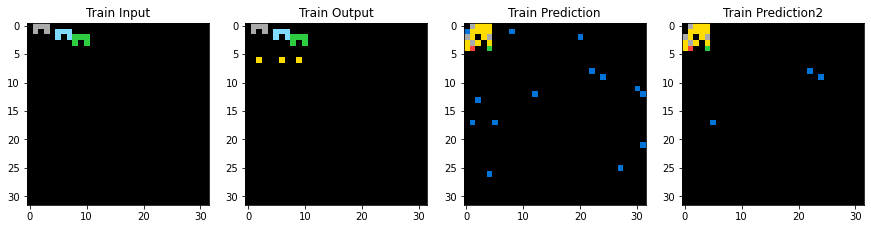

In [35]:
cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
fig, ax = plt.subplots(1, 4, figsize=(15,15))
ax[0].imshow(v[0], cmap=cmap, norm=norm)
ax[0].set_title('Train Input')
ax[1].imshow(y, cmap=cmap, norm=norm)
ax[1].set_title('Train Output')
ax[2].imshow(new_arr[0], cmap=cmap, norm=norm)
ax[2].set_title('Train Prediction')
ax[3].imshow(arr, cmap=cmap, norm=norm)
ax[3].set_title('Train Prediction2');

In [36]:
i = 0
c = 0
for task in Xs_train_orig:
    i+=1
    j = 0
    for e in task:
        j+=1
        c += 1
        if c > 124:
            break
    if c > 124:
        break

In [37]:
i,j

(40, 3)

In [38]:
ww = (np.array(Xs_train_tasks[40][0]).reshape(32,32))*10

In [40]:
vv = (np.array(ys_train_tasks[40][0]).reshape(32,32))*10

In [41]:
tt = ww.reshape(1,32,32,1)

In [42]:
encoded_imgs = base_model.encoder(tt).numpy()
decoded_imgs = base_model.decoder(encoded_imgs).numpy()

In [43]:
arr=(decoded_imgs[0].reshape(32,32))*10

In [44]:
arr[:10,:10].shape

(10, 10)

In [45]:
np.asarray(Xs_train_orig[40][0]).shape, np.asarray(ys_train_orig[40][0]).shape

((10, 10), (10, 10))

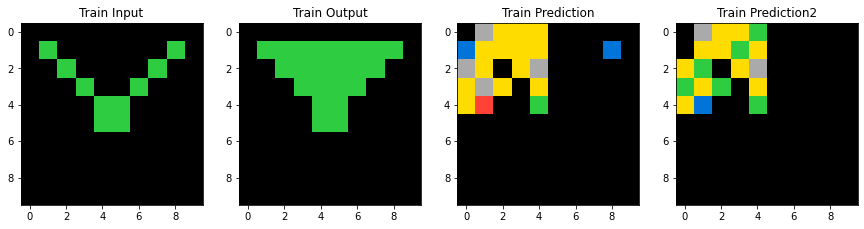

In [46]:
cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
fig, ax = plt.subplots(1, 4, figsize=(15,15))
ax[0].imshow(ww[:10,:10], cmap=cmap, norm=norm)
ax[0].set_title('Train Input')
ax[1].imshow(vv[:10,:10], cmap=cmap, norm=norm)
ax[1].set_title('Train Output')
ax[2].imshow(new_arr[0][:10,:10], cmap=cmap, norm=norm)
ax[2].set_title('Train Prediction')
ax[3].imshow(arr[:10,:10], cmap=cmap, norm=norm)
ax[3].set_title('Train Prediction2');

In [49]:
ww = (np.array(Xs_train_tasks[40][0]).reshape(32,32))*10

vv = (np.array(ys_train_tasks[40][0]).reshape(32,32))*10

tt = ww.reshape(1,32,32,1)

encoded_imgs = base_model.encoder(tt).numpy()
decoded_imgs = base_model.decoder(encoded_imgs).numpy()

arr=(decoded_imgs[0].reshape(32,32))*10

test = (np.array(Xs_test_tasks[40]).reshape(32,32))*10

test_pred = test.reshape(1,32,32,1)
encoded_imgs2 = base_model.encoder(test_pred).numpy()
decoded_imgs2 = base_model.decoder(encoded_imgs2).numpy()
test_pred = (decoded_imgs2[0].reshape(32,32))*10

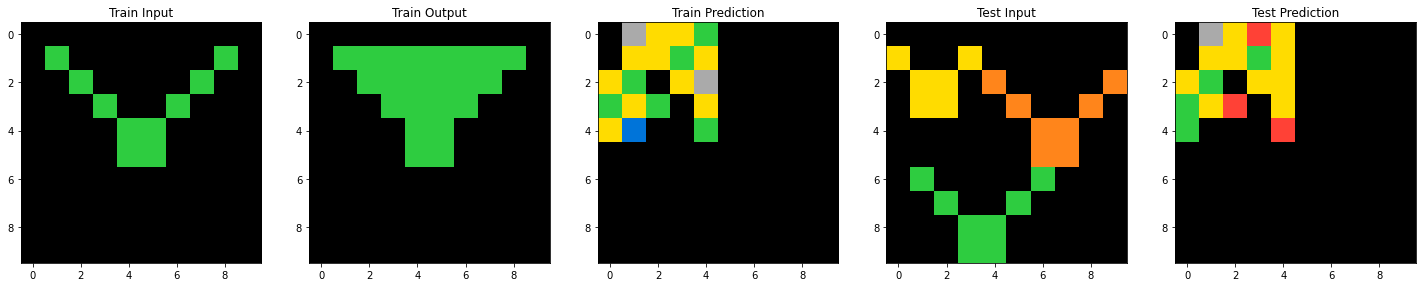

In [50]:
cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
fig, ax = plt.subplots(1, 5, figsize=(25,25))
ax[0].imshow(ww[:10,:10], cmap=cmap, norm=norm)
ax[0].set_title('Train Input')
ax[1].imshow(vv[:10,:10], cmap=cmap, norm=norm)
ax[1].set_title('Train Output')
ax[2].imshow(arr[:10,:10], cmap=cmap, norm=norm)
ax[2].set_title('Train Prediction')
ax[3].imshow(test[:10,:10], cmap=cmap, norm=norm)
ax[3].set_title('Test Input')
ax[4].imshow(test_pred[:10,:10], cmap=cmap, norm=norm)
ax[4].set_title('Test Prediction');
